In [38]:
import pandas as pd
import pymorphy2
import nltk
from nltk.corpus import stopwords
import re
import unicodedata
import seaborn as sns

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nkhozin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stopWords = stopwords.words("russian")

In [4]:
morph = pymorphy2.MorphAnalyzer(lang='ru')

In [53]:
train = pd.read_csv('data\\train.csv', index_col=0)
train_small = pd.read_csv('data\\train_small.csv', index_col=0)

In [54]:
train = pd.concat([train, train_small], axis=0)

In [56]:
train = train[(train['type']!='para_phraser')&(train['size'].isin(['small','medium']))]

In [57]:
train.shape

(83118, 8)

In [58]:
train.head()

,source,target,type,source_len,target_len,size,part,mark
64407,simplify | Сторонники Уго Чавеса не видели сво...,Основное оппозиционное движение в Венесуэле пр...,ru_xlsum,796,40,medium,5.025126,0
2251,"simplify | Он пошел по дороге, огибающей парк,...",VII Он пошёл к своей даче. Сердце его стучало...,ru_adapt,147,146,small,99.319728,1
5479,simplify | * * * По Тверскому бульвару быстрым...,"По Тверскому бульвару быстро шёл хорошо, но не...",ru_adapt,216,74,small,34.259259,1
4056,simplify | Слышно: «Прощайте! Будьте здоровы!»...,Андрей в пальто и шляпе и Чебутыкин тихо входят.,ru_adapt,82,20,small,24.390244,1
22174,simplify | Это было для нее загадкою.,Это было для неё загадкой.,ru_adapt,14,11,small,78.571429,1


In [59]:
def lineWithoutStopWords(line):
    return [word for word in line if word not in stopWords]

def lemmatize(text):
    res = list()
    for word in text:
        p = morph.parse(word)[0]
        res.append(p.normal_form)
    return res

In [60]:
train.source = train.source.apply(lambda values: values.split('| ')[1])

C:\Users\nkhozin\AppData\Local\Temp\ipykernel_11336\4137111929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.source = train.source.apply(lambda values: values.split('| ')[1])


In [61]:
train.source = train.source.apply(lambda value: unicodedata.normalize("NFKD", value))
train.target = train.target.apply(lambda value: unicodedata.normalize("NFKD", value))

C:\Users\nkhozin\AppData\Local\Temp\ipykernel_11336\53206757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.source = train.source.apply(lambda value: unicodedata.normalize("NFKD", value))
C:\Users\nkhozin\AppData\Local\Temp\ipykernel_11336\53206757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.target = train.target.apply(lambda value: unicodedata.normalize("NFKD", value))


In [62]:
%%time

train['source_clean'] = train.source.apply(lambda value: re.sub(r'[^\w\s]',' ',value,flags=re.UNICODE))
train['target_clean'] = train.target.apply(lambda value: re.sub(r'[^\w\s]',' ',value,flags=re.UNICODE))

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1.27 s
Wall time: 1.24 s


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:
%%time

train['source_clean'] = train.source_clean.apply(lambda values: ' '.join(lineWithoutStopWords(values.split(' '))))
train['target_clean'] = train.target_clean.apply(lambda values: ' '.join(lineWithoutStopWords(values.split(' '))))

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 15.4 s
Wall time: 15.4 s


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
%%time

train['source_clean'] = train['source_clean'].apply(lambda value: (re.sub(' +', ' ', value).strip().split(' ')))
train['target_clean'] = train['target_clean'].apply(lambda value: (re.sub(' +', ' ', value).strip().split(' ')))

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 2.73 s
Wall time: 2.73 s


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:
train[train.source_len<=train.target_len]

,source,target,type,source_len,target_len,size,part,mark,source_clean,target_clean


In [66]:
%%time

train['source_clean'] = train.source_clean.apply(lemmatize)
train['target_clean'] = train.target_clean.apply(lemmatize)

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 14min 59s
Wall time: 15min


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
%%time

train['same_lemm_count'] = train.apply(lambda row: len(set(row['source_clean']).intersection(row['target_clean'])), axis=1)

CPU times: total: 984 ms
Wall time: 981 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Axes: xlabel='same_lemm_count', ylabel='Count'>

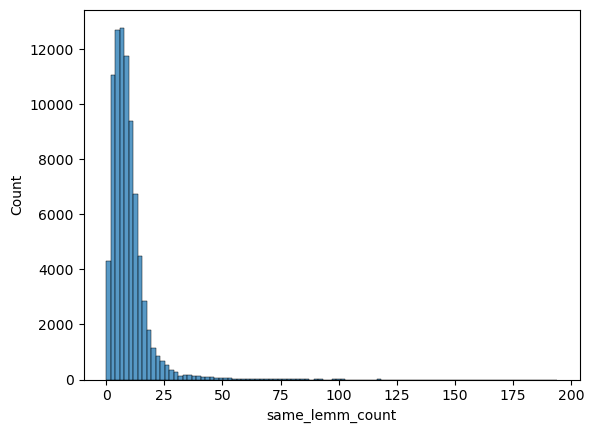

In [68]:
sns.histplot(train.same_lemm_count, bins=100)

In [69]:
train[train.same_lemm_count<=2].shape

(9248, 11)

In [70]:
train[train.same_lemm_count<=2]['type'].value_counts()

ru_adapt    7021
ru_xlsum    1694
ru_simp      528
gazeta         5
Name: type, dtype: int64

In [71]:
train = train[train.same_lemm_count>2]

In [72]:
train.shape

(73870, 11)

In [73]:
train['type'].value_counts()

ru_xlsum    33812
ru_adapt    33072
ru_simp      4624
gazeta       2362
Name: type, dtype: int64

In [74]:
%%time

train.source = train.source.apply(lambda value: f'simplify | {value}')

CPU times: total: 62.5 ms
Wall time: 68.8 ms


In [75]:
train.head(3)

,source,target,type,source_len,target_len,size,part,mark,source_clean,target_clean,same_lemm_count
64407,simplify | Сторонники Уго Чавеса не видели сво...,Основное оппозиционное движение в Венесуэле пр...,ru_xlsum,796,40,medium,5.025126,0,"[сторонник, уго, чавес, видеть, свой, лидер, т...","[основный, оппозиционный, движение, венесуэла,...",10
2251,"simplify | Он пошел по дороге, огибающей парк...",VII Он пошёл к своей даче. Сердце его стуча...,ru_adapt,147,146,small,99.319728,1,"[он, пойти, дорога, огибающей, парк, своей, да...","[vii, он, пош, л, своей, дача, сердце, стучать...",18
5479,simplify | * * * По Тверскому бульвару быстрым...,"По Тверскому бульвару быстро шёл хорошо, но н...",ru_adapt,216,74,small,34.259259,1,"[по, тверской, бульвар, быстрый, неверный, шаг...","[по, тверской, бульвар, быстро, ше, л, неаккур...",8


<Axes: xlabel='part', ylabel='Count'>

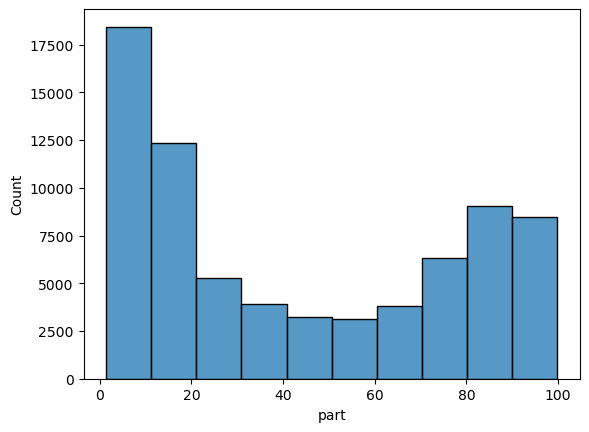

In [79]:
sns.histplot(train.part, bins=10)

In [84]:
train = train[(train.part>10)&(train.part<90)]

In [85]:
train.to_csv('data\\train_small_medium_mix_clean.csv')